1. [CatBoost](#catboost)

#### CatBoost:
- very similar to gradient boosting and xgboost algorithms

- lets consider the dataset for Catboost algorithm

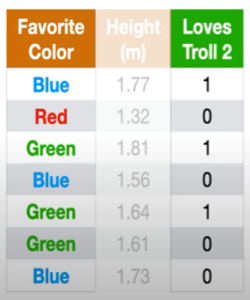

In [15]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data.png')
new_image = img.resize((250, 300))
display(new_image)

- if we try target encoding, then it might lead to data leakage for feature Favorite Color
- To overcome this, we could perform K-Fold Target Encoding
- However, from the Catboost manuscript, if there is a feature with only 1 category and perform Leave-one-out encoding with Smoothing/M-estimation

Note:
- the library used: 'import category_encoders as ce'

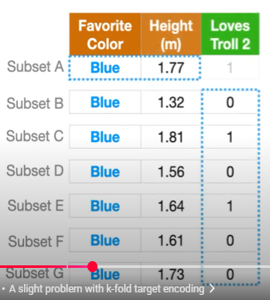

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data2.png')
new_image = img.resize((270, 300))
display(new_image)

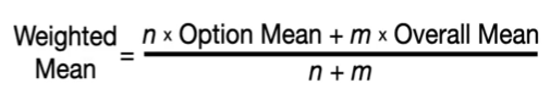

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/leave_one_out.png')
new_image = img.resize((550, 100))
display(new_image)

- n = count of each category
- m = smoothing parameter

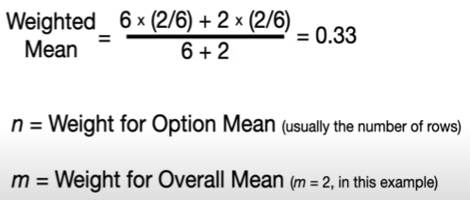

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/leave_one_out2.png')
new_image = img.resize((470, 200))
display(new_image)

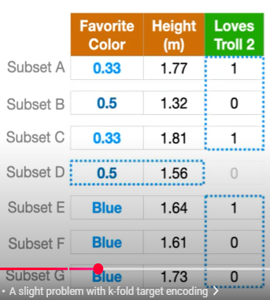

In [12]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data3.png')
new_image = img.resize((270, 300))
display(new_image)

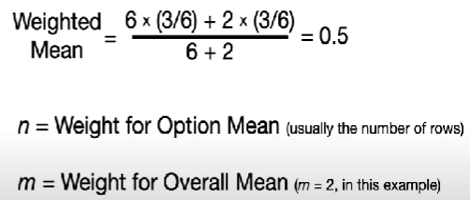

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/leave_one_out3.png')
new_image = img.resize((470, 200))
display(new_image)

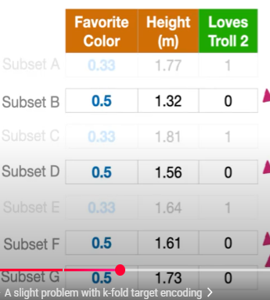

In [14]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data4.png')
new_image = img.resize((270, 300))
display(new_image)

- we can find, by performing leave one out encoding, leakage is still persistent
- so catboost introduced a new encoding technique

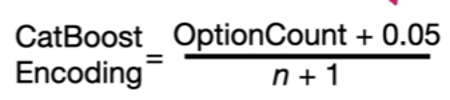

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/encoding.png')
new_image = img.resize((450, 100))
display(new_image)

- n = number of rows seen before that have the same value for favourite color 
- optionCount = number of rows seen before w.r.t the output label
- usually set the value term = 0.05 after the OptionCount

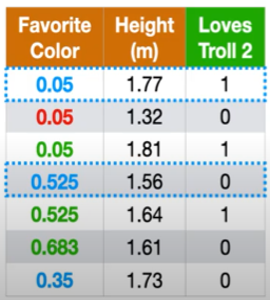

In [16]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data5.png')
new_image = img.resize((270, 300))
display(new_image)

- likewise, if we have target values that are continuous in nature, we create bins and assign them a value such as 0, 1, etc

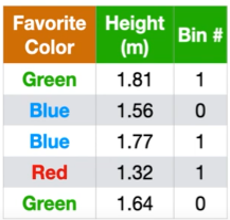

In [21]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data6.png')
new_image = img.resize((230, 220))
display(new_image)

- then perform ordered target encoding

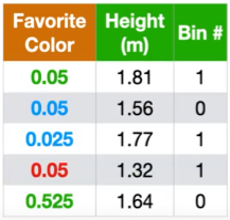

In [22]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data7.png')
new_image = img.resize((230, 220))
display(new_image)

- now the initial prediction is 0 and calculate the residuals

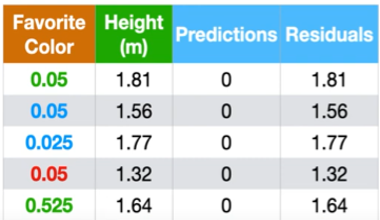

In [29]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/residuals.png')
new_image = img.resize((380, 220))
display(new_image)

- we sort the values in the feature in ascending order
- we now perform discretization (only when there is a different average value compared to the adjacent values from the records as shown below)

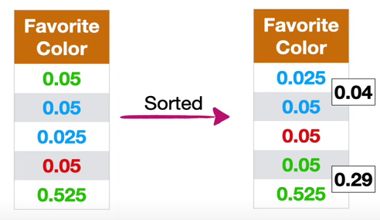

In [32]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cond.png')
new_image = img.resize((380, 220))
display(new_image)

- now while building the tree, we consider the first condition "0.04" to perform the split for the tree
- now, we calculate the leaf output for each record
    - 1st record, the leaf output is 0 (right-side)
    - 2nd record, the leaf output is 1.81 (right-side)
    - 3rd record, the leaf output is 0 (left-side)
    - 4th record, the leaf output is (1.81+1.56)/2 = 1.69 (right-side)
    - 5th record, the leaf output is (1.81+1.56+1.32)/3 = 1.56 (right-side)

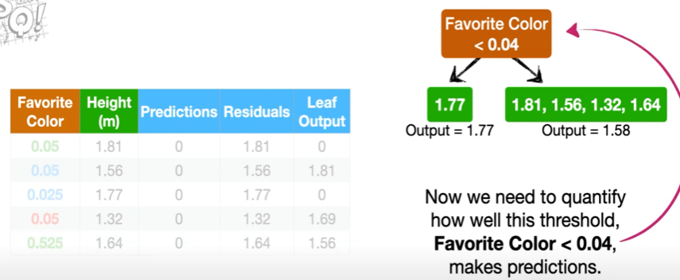

In [31]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/residuals2.png')
new_image = img.resize((680, 280))
display(new_image)

- now, we calculate the cosine similarity between residuals and leaf outputs
    - cosine similarity score = 0.71

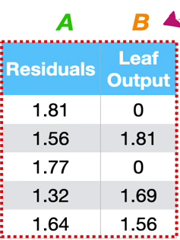

In [43]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cosine_calc.png')
new_image = img.resize((180, 240))
display(new_image)

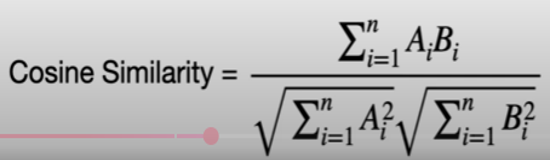

In [42]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cosine.png')
new_image = img.resize((550, 160))
display(new_image)

- now, we consider the second condition "0.29" to perform the split for the tree
- now, we calculate the leaf output for each record
    - 1st record, the leaf output is 0 (left-side)
    - 2nd record, the leaf output is 1.81 (left-side)
    - 3rd record, the leaf output is (1.81+1.56)/2 = 1.69 (left-side)
    - 4th record, the leaf output is (1.81+1.56+1.77)/3 = 1.71 (left-side)
    - 5th record, the leaf output is  0 (right-side)

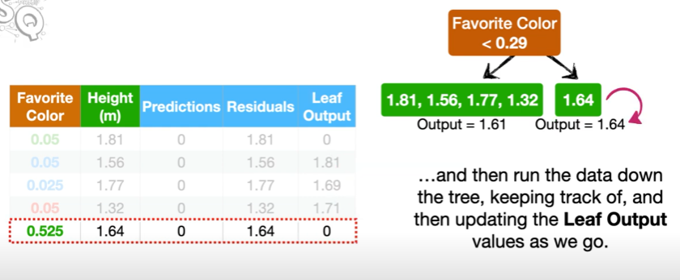

In [44]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/residuals3.png')
new_image = img.resize((680, 280))
display(new_image)

- now again, consider the residuals and leaf output as the A & B for cosine similarity calculation
    - cosine similarity score = 0.79
- now comparing both the similarity score, we find the value which has highest similarity score i.e. 0.71 for 0.29
- now we have built the tree successfully and we make predictions now
- while predictions, we multiply the output values with learning rate

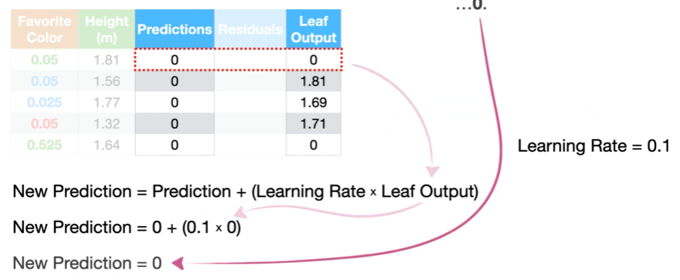

In [45]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/updated_pred.png')
new_image = img.resize((680, 280))
display(new_image)

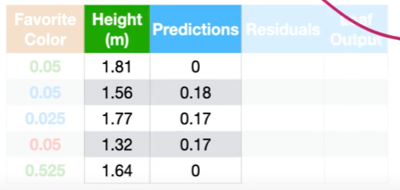

In [50]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/updated_pred2.png')
new_image = img.resize((400, 190))
display(new_image)

- we could identify that the output values for trees in catboost is calculated very similar to ordered target encoding which takes the values for calculation sequentially 
- we again calculate the residuals

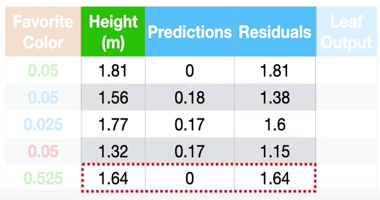

In [52]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/residuals4.png')
new_image = img.resize((380, 200))
display(new_image)

- now again, we replace the ordered encoded variable with original categorical data and shuffle the records

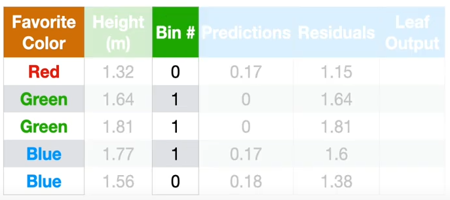

In [55]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data8.png')
new_image = img.resize((450, 200))
display(new_image)

- create bin based on the target variable
- repeat performing ordered target encoding using catboost encoding techniques

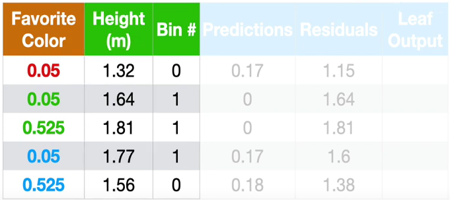

In [56]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data9.png')
new_image = img.resize((450, 200))
display(new_image)

- we sort the values and find the split condition for which the average values not the same as adjacent values

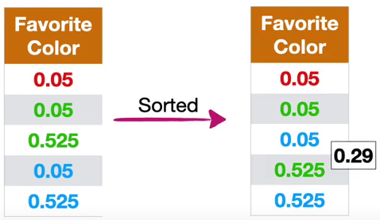

In [57]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cond2.png')
new_image = img.resize((380, 220))
display(new_image)

- now calculate the leaf output based on the residuals

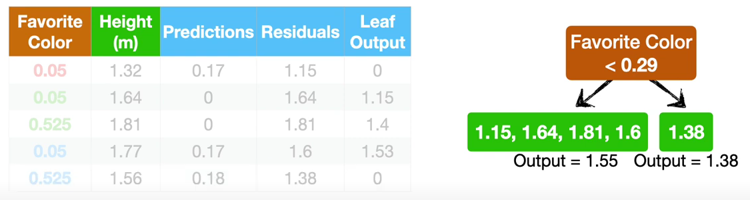

In [60]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/residuals5.png')
new_image = img.resize((750, 200))
display(new_image)

- since there is only one split condition, we do not perform cosine similarity here
- we perform predictions by the same formula used before
    - new predictions = prediction old + (learning rate * leaf output)

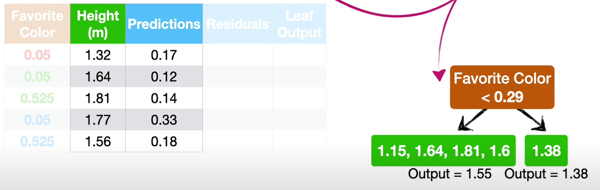

In [62]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/updated_pred3.png')
new_image = img.resize((600, 190))
display(new_image)

- now, while testing a new data point with "blue" as datapoint
    - in relevance to the train data target encoding, we perform target encoding for the test data as well

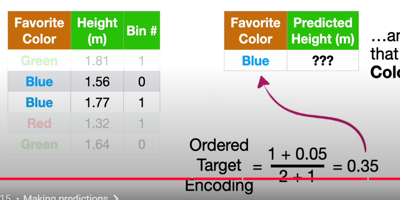

In [67]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/encoding2.png')
new_image = img.resize((400, 200))
display(new_image)

- to perform predictions after building N trees, we use the below formula

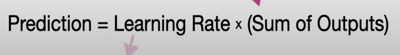

In [68]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/prediction.png')
new_image = img.resize((400, 55))
display(new_image)

- the tree built in catboost are symmetrical and makes it relatively fast

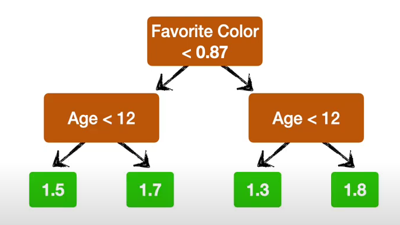

In [72]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/symmetric.png')
new_image = img.resize((400, 225))
display(new_image)